##  setting up necessary libraries, variabeles and DataFrames 

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

diabete = pd.read_csv('HBA1C-15-AOUT-2024-p2.csv')
diabete = diabete.drop('Unnamed: 0',axis = 1)
diabete['Date'] = pd.to_datetime(diabete['Date'])
diabete['year'] = diabete['Date'].dt.year
diabete['month'] = diabete['Date'].dt.month

the cleaning used to prepare the data set

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# loading the dataset
df = pd.read_csv('HBA1C-15-AOUT-2024.csv')
diabete = pd.read_csv('HBA1C-15-AOUT-2024-p2.csv')
diabete = diabete.drop('Unnamed: 0',axis = 1)
diabete['Date'] = pd.to_datetime(diabete['Date'])
#columns = ['Numero','Date','Retour','Nom','Age','%','Type','Insuline','Ado','Poids']

# some usefull variables
keylist = ['Date','Nom','Age','%','Type','Poids']
numbers = ['Age','Poids','%','Retour']

# columns with no null values
age_non_null = df.index[df['Age'].notnull()]
poids_non_null = df.index[df['Poids'].notnull()]

# changing types
for key in range(df.shape[0]):
    
    # changing to datetime
    df.iloc[key,1] = pd.to_datetime(df.iloc[key,1])
    
    # changing % to float 
    per = df.iloc[key,5]
    df.iloc[key,5] = float(per[:len(per) - 1])
    
    # changing retour to int
    df.iloc[key,2] = int(df.iloc[key,2])
    
# changing age to int
for key in age_non_null:
    df.iloc[key,4] = int(df.iloc[key,4])
   
# changing poids to int
for key in poids_non_null :
    df.iloc[key,9] = float(df.iloc[key,9])

# freq returns
freq_return = diabete[diabete['Retour'] > 2 ]

# getting there names 
# names is a list contains the names of people with return > 2 
names = []
# return_4_index their indexes
return_4_index = freq_return.index[freq_return['Retour'] == 3]

for key in return_4_index:
    names.append(diabete.iloc[key,3])

freq_return = diabete[diabete['Nom'].isin(names)]

# first contains the people coming for the first time 
first = freq_return[freq_return['Retour'] == 1]

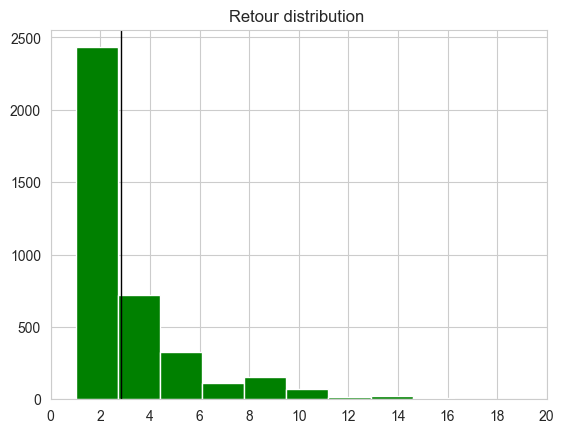

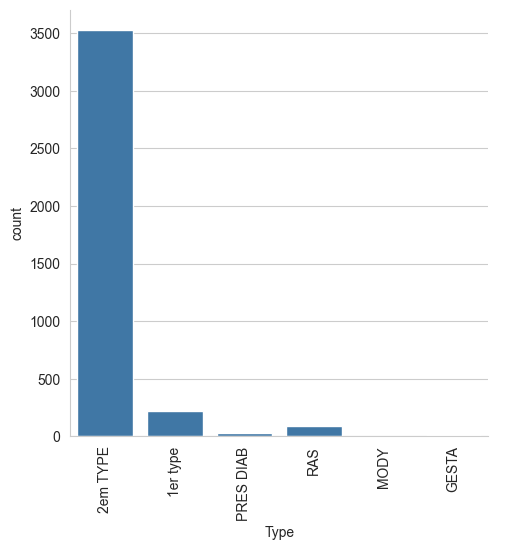

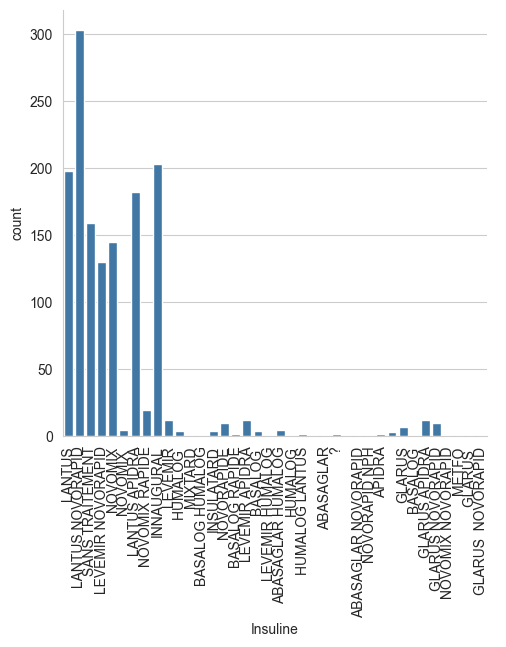

In [18]:

strings= ['Type','Insuline']

# looking in general histograms of the Retour
diabete['Retour'].hist(color = 'g')
plt.axvline(diabete['Retour'].mean(), color='k', linewidth=1)
plt.xticks([0,2,4,6,8,10,12,14,16,18,20])
plt.title('Retour distribution ')
plt.show()

# looking in general histograms of Type , insuline
for key in strings:
    sns.catplot(x=diabete[key],kind='count')
    plt.xticks(rotation=90)
    plt.show()

    

percentage of null values =  0.8006198347107437 

              Age
max     97.000000
min      6.000000
mean    56.120281
median  57.000000
std     14.357711 



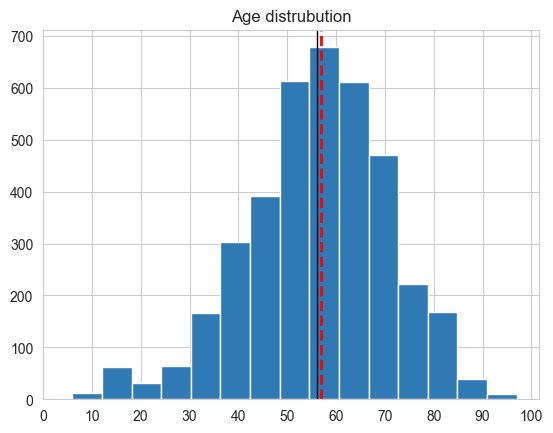

kowing about the oldest person


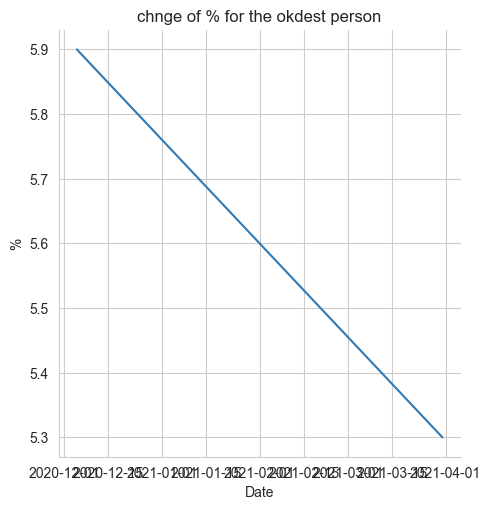

In [19]:

# analyzing Age 

# % of null values
print('percentage of null values = ',(diabete[diabete['Age'].isnull()].shape[0] / diabete.shape[0]) *100,'\n')

#getting some statistics
info_age = diabete[['Age']].agg(['max',"min",'mean','median','std'])
print(info_age,'\n')

max_age = info_age.iloc[0,0]

# drowing the histogram
diabete['Age'].hist(bins = 15)
plt.axvline(diabete['Age'].mean(), color='k', linewidth=1)
plt.axvline(diabete['Age'].median(), color='r', linestyle='dashed', linewidth=2)
plt.title('Age distrubution')
plt.xticks([0,10,20,30,40,50,60,70,80,90,100])
plt.show()

# kowing about the max
max_age_nom= diabete[diabete['Age'] == max_age].iloc[0,3]
max_age_table = diabete[diabete['Nom'] == max_age_nom]
print('kowing about the oldest person')

sns.relplot(x='Date',y='%',data=max_age_table,markers=False,kind='line')
plt.title('chnge of % for the okdest person')
plt.show()
    

percentage of null values =  0.46642561983471076 

some statistics on poids 

              Poids
max     130.000000
min      22.000000
mean     74.585189
median   75.000000
std      14.757171 



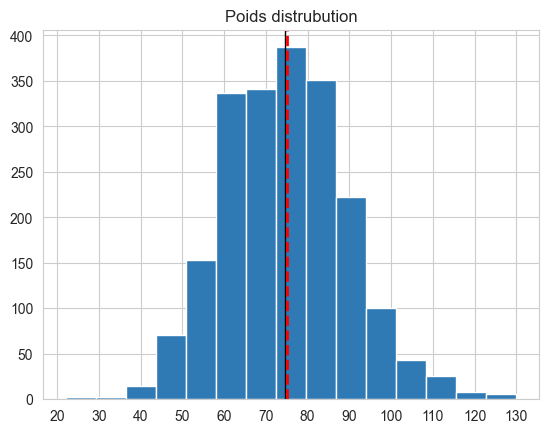

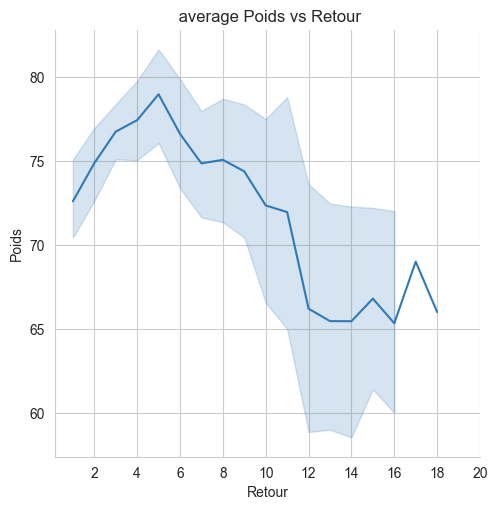

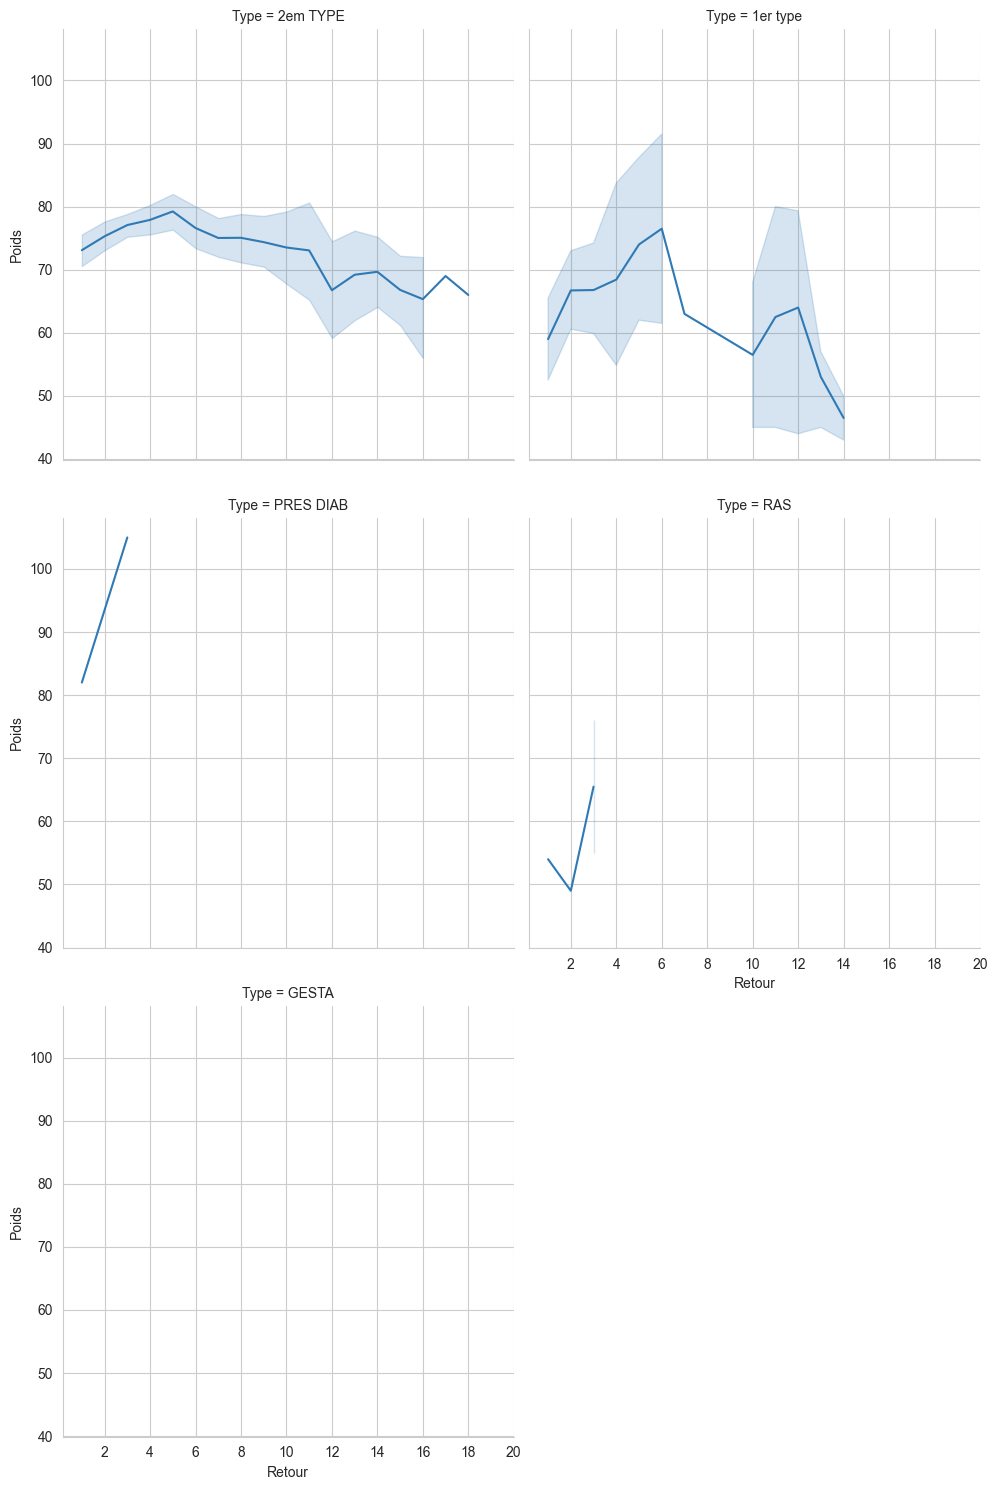

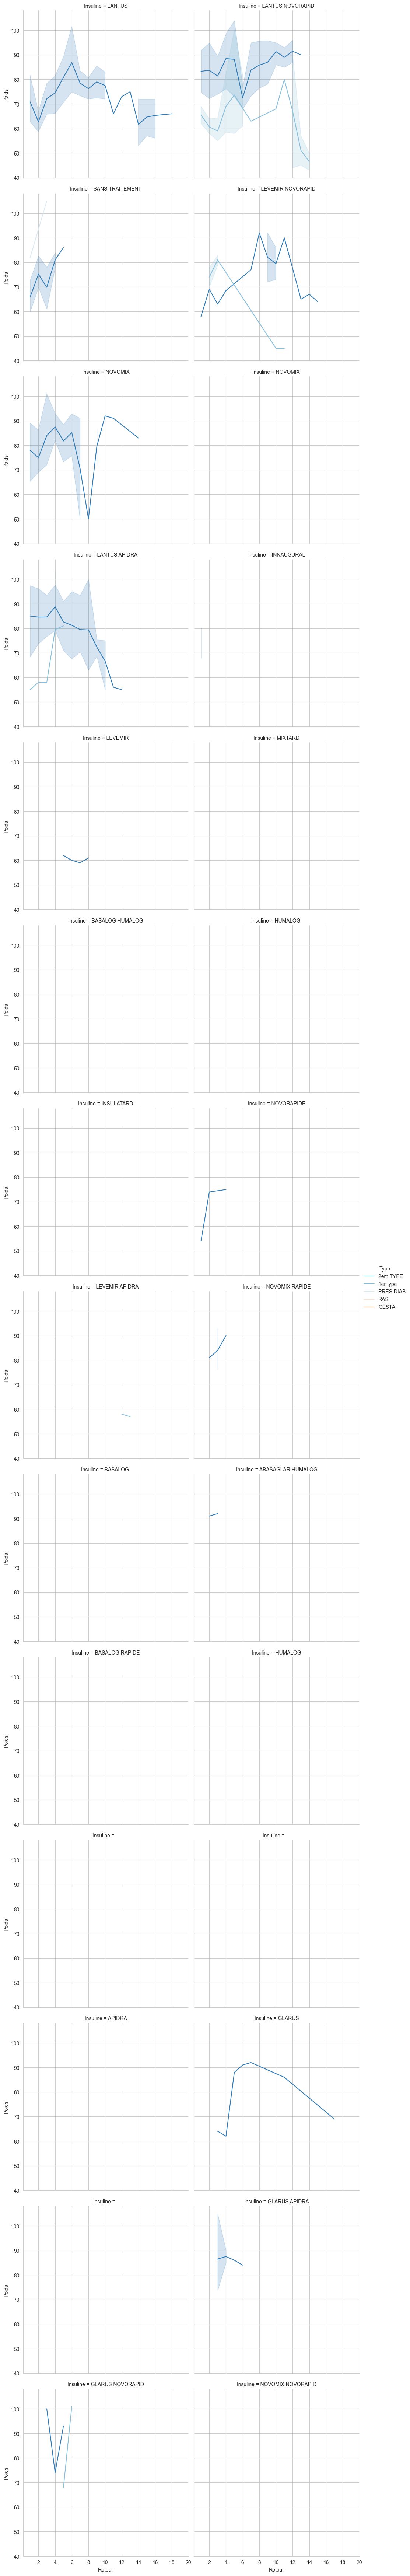

Retour =   1


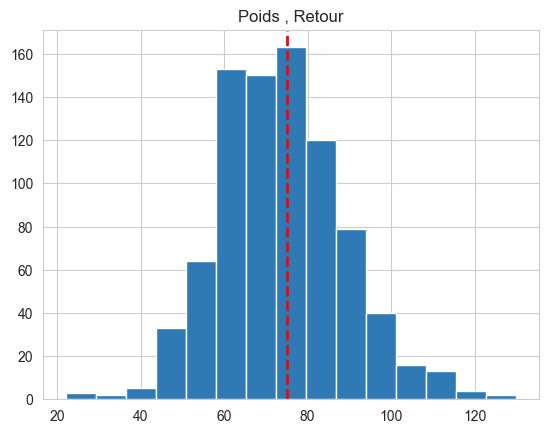

Retour =   2


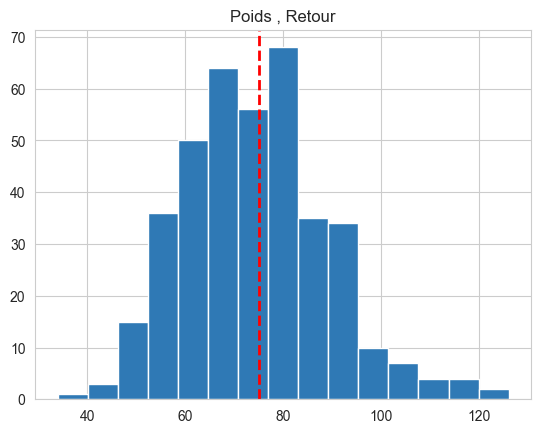

Retour =   3


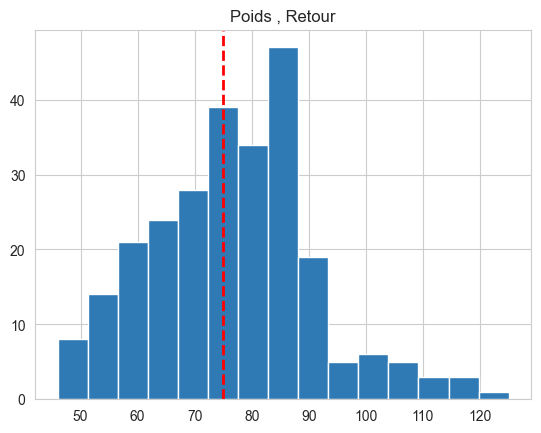

Retour =   4


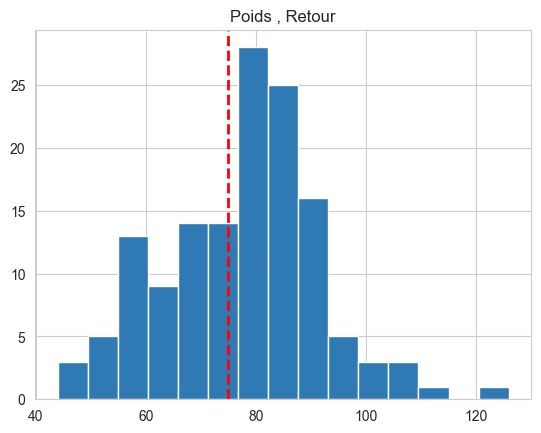

Retour =   5


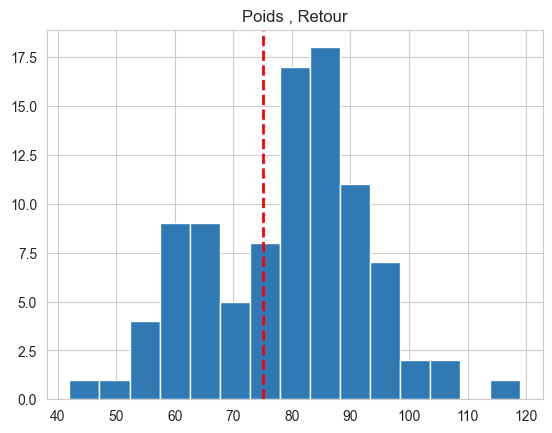

In [20]:

keylist = ['Date','Nom','Age','%','Type','Poids']
# analyzing Poids

print('percentage of null values = ',diabete[diabete['Poids'].isnull()].shape[0] / diabete.shape[0],'\n')

# getting some statistics on poids
info_Poids = diabete[['Poids']].agg(['max',"min",'mean','median','std'])
print('some statistics on poids \n\n',info_Poids,'\n')

# drowing the general histogram
diabete['Poids'].hist(bins = 15)
plt.axvline(diabete['Poids'].mean(), color='k', linewidth=1)
plt.axvline(diabete['Poids'].median(), color='r', linestyle='dashed', linewidth=2)
plt.title('Poids distrubution')
plt.xticks([20,30,40,50,60,70,80,90,100,110,120,130])
plt.show()

# looking for changes over return 
# poids cs retour
sns.relplot(x='Retour',y='Poids',data=freq_return,kind='line')
plt.xticks([2,4,6,8,10,12,14,16,18,20])
plt.title(' average Poids vs Retour')
plt.show()

# change of poids vs Retour with types and insuline type
sns.relplot(x='Retour',y='Poids',data=freq_return,kind='line',col='Type',col_wrap=2)
plt.xticks([2,4,6,8,10,12,14,16,18,20])
plt.show()

# change of poids vs Retour with types and insuline type
sns.relplot(x='Retour',y='Poids',data=freq_return,kind='line',hue ='Type',col='Insuline',col_wrap=2)
plt.xticks([2,4,6,8,10,12,14,16,18,20])
plt.show()

# change of poids distrubution over time
for key in range(5):
    by_retour = diabete[diabete['Retour'] == key + 1]
    by_retour['Poids'].hist(bins = 15)
    plt.axvline(diabete['Poids'].median(), color='r', linestyle='dashed', linewidth=2)
    print('Retour =  ',key + 1 )
    plt.title('Poids , Retour')
    plt.show()

#hue ='Type',col='Insuline',col_wrap=2

percentage of null values =  0.0 

some statistics on % 

                 %
max     18.700000
min      3.100000
mean     7.800465
median   7.300000
std      1.975306 



C:\Users\anasd\AppData\Local\Temp\ipykernel_25984\2563997535.py:7: FutureWarning: The provided callable <function max at 0x000001F8E3493A60> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  info_Poids = diabete[['%']].agg([np.max,np.min,np.mean,np.median,np.std])
C:\Users\anasd\AppData\Local\Temp\ipykernel_25984\2563997535.py:7: FutureWarning: The provided callable <function min at 0x000001F8E3493BA0> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  info_Poids = diabete[['%']].agg([np.max,np.min,np.mean,np.median,np.std])
C:\Users\anasd\AppData\Local\Temp\ipykernel_25984\2563997535.py:7: FutureWarning: The provided callable <function mean at 0x000001F8E34A84A0> is currently using Series.mean. In a future version of pandas, the provided callable will be used 

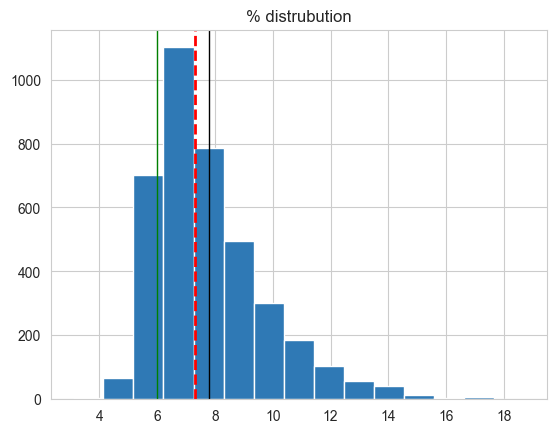

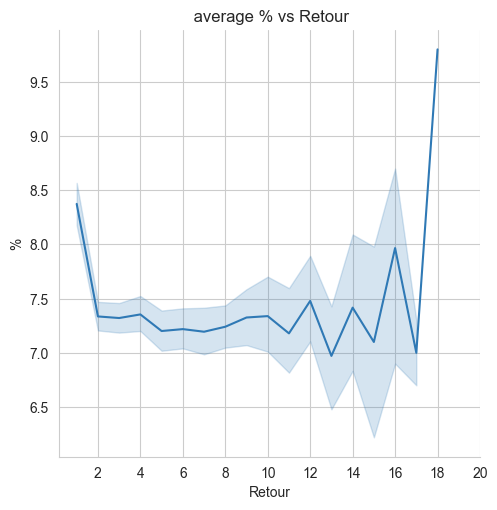

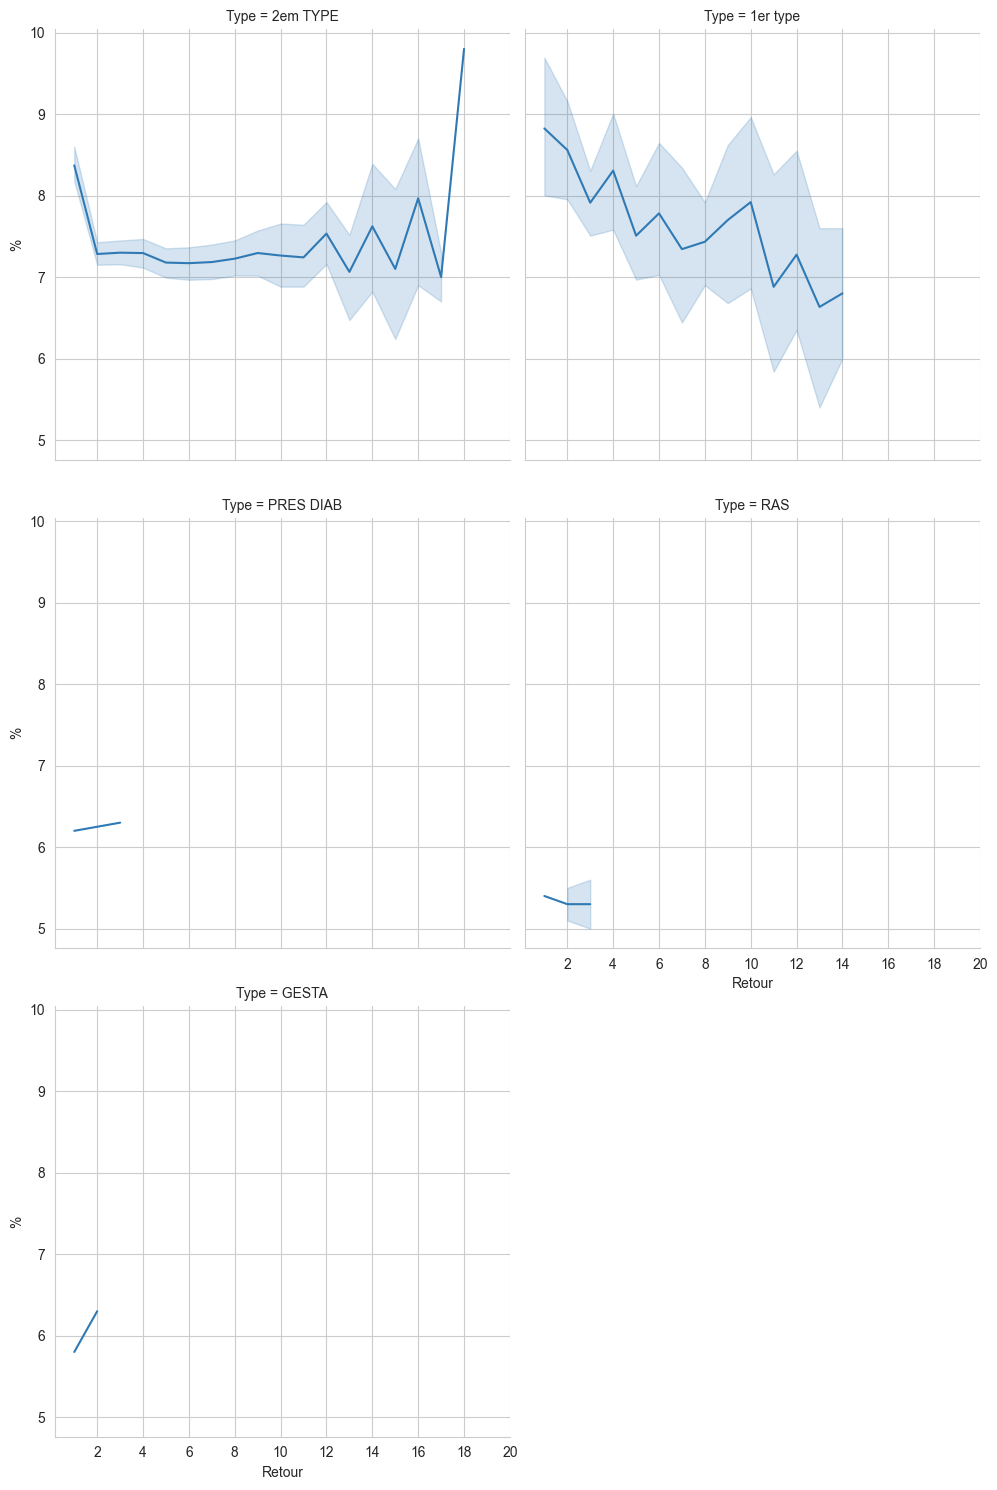

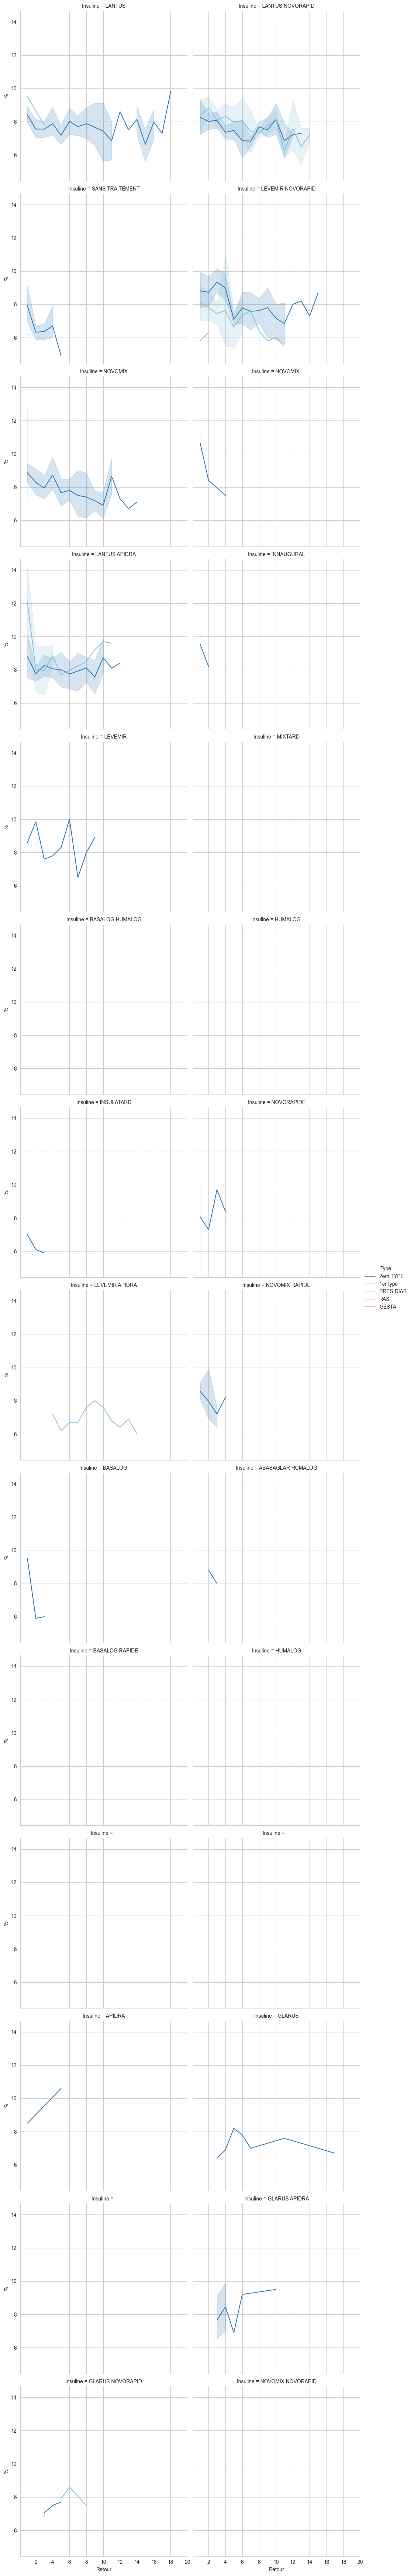

Retour =   1


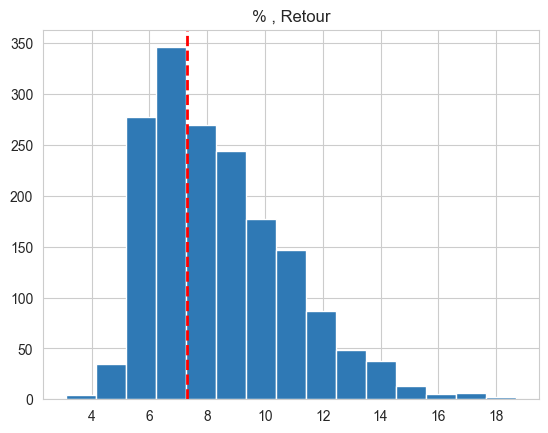

Retour =   2


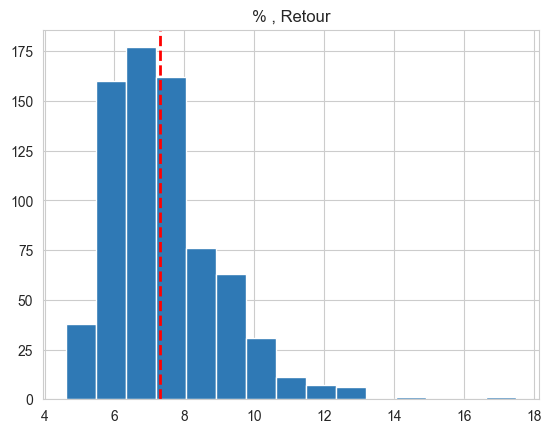

Retour =   3


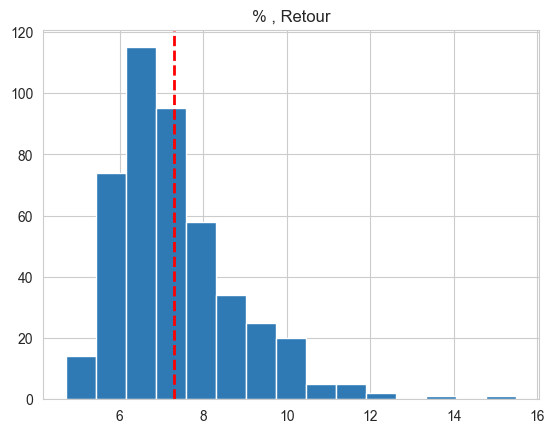

Retour =   4


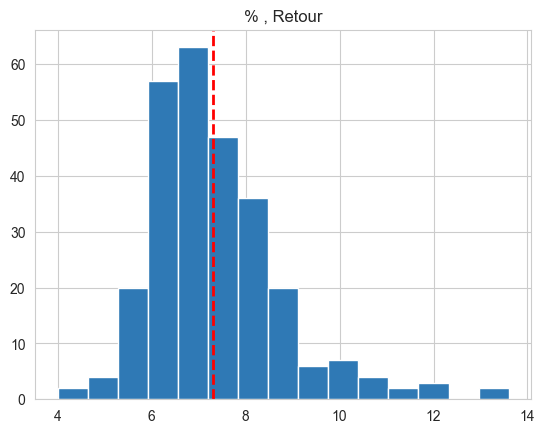

Retour =   5


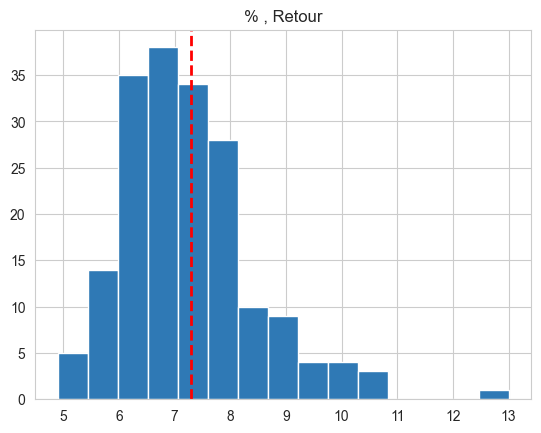

In [21]:

# analyzing % over time

# % of null values
print('percentage of null values = ',diabete[diabete['%'].isnull()].shape[0] / diabete.shape[0],'\n')

# getting some statistics on %
info_Poids = diabete[['%']].agg([np.max,np.min,np.mean,np.median,np.std])
print('some statistics on % \n\n',info_Poids,'\n')

# drowing the genral histogram
diabete['%'].hist(bins = 15)
plt.axvline(6, color='g', linewidth=1)
plt.axvline(diabete['%'].mean(), color='k', linewidth=1)
plt.axvline(diabete['%'].median(), color='r', linestyle='dashed', linewidth=2)
plt.title('% distrubution')
plt.show()

# looking for changes over return 
# % Vs retour
sns.relplot(x='Retour',y='%',data=freq_return,kind='line')
plt.xticks([2,4,6,8,10,12,14,16,18,20])
plt.title(' average % vs Retour')
plt.show()

# change of poids vs Retour with  type
sns.relplot(x='Retour',y='%',data=freq_return,kind='line',col ='Type',col_wrap=2)
plt.xticks([2,4,6,8,10,12,14,16,18,20])
plt.show()

# change of poids vs Retour with types and insuline type

sns.relplot(x='Retour',y='%',data=freq_return,kind='line',hue ='Type',col='Insuline',col_wrap=2)
plt.xticks([2,4,6,8,10,12,14,16,18,20])
plt.show()

# change of % distrubution over Retour
for key in range(5):
    by_retour = diabete[diabete['Retour'] == key + 1]
    by_retour['%'].hist(bins = 15)
    plt.axvline(diabete['%'].median(), color='r', linestyle='dashed', linewidth=2)
    print('Retour =  ',key + 1 )
    plt.title('% , Retour')
    plt.show()


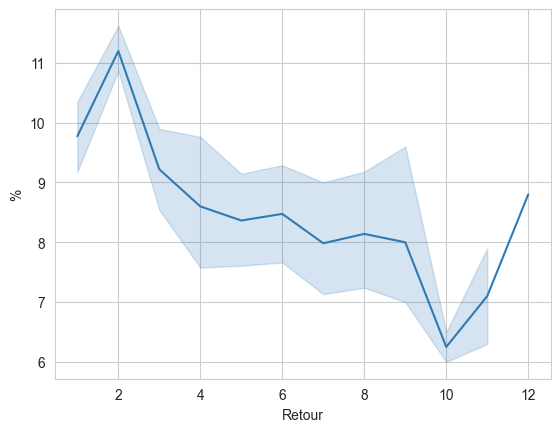

In [22]:
lis1 = []
above = diabete[(diabete['%'] >= 10) & (diabete['Retour'] == 2)]

for key in range(above.shape[0]):
    lis1.append(above.iloc[key,3])

above = diabete[diabete['Nom'].isin(lis1)]


sns.lineplot(x='Retour',y='%',data=above)
plt.show()

## Answering some questions

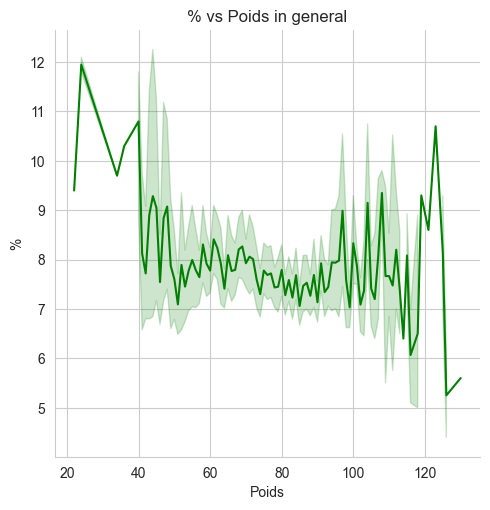

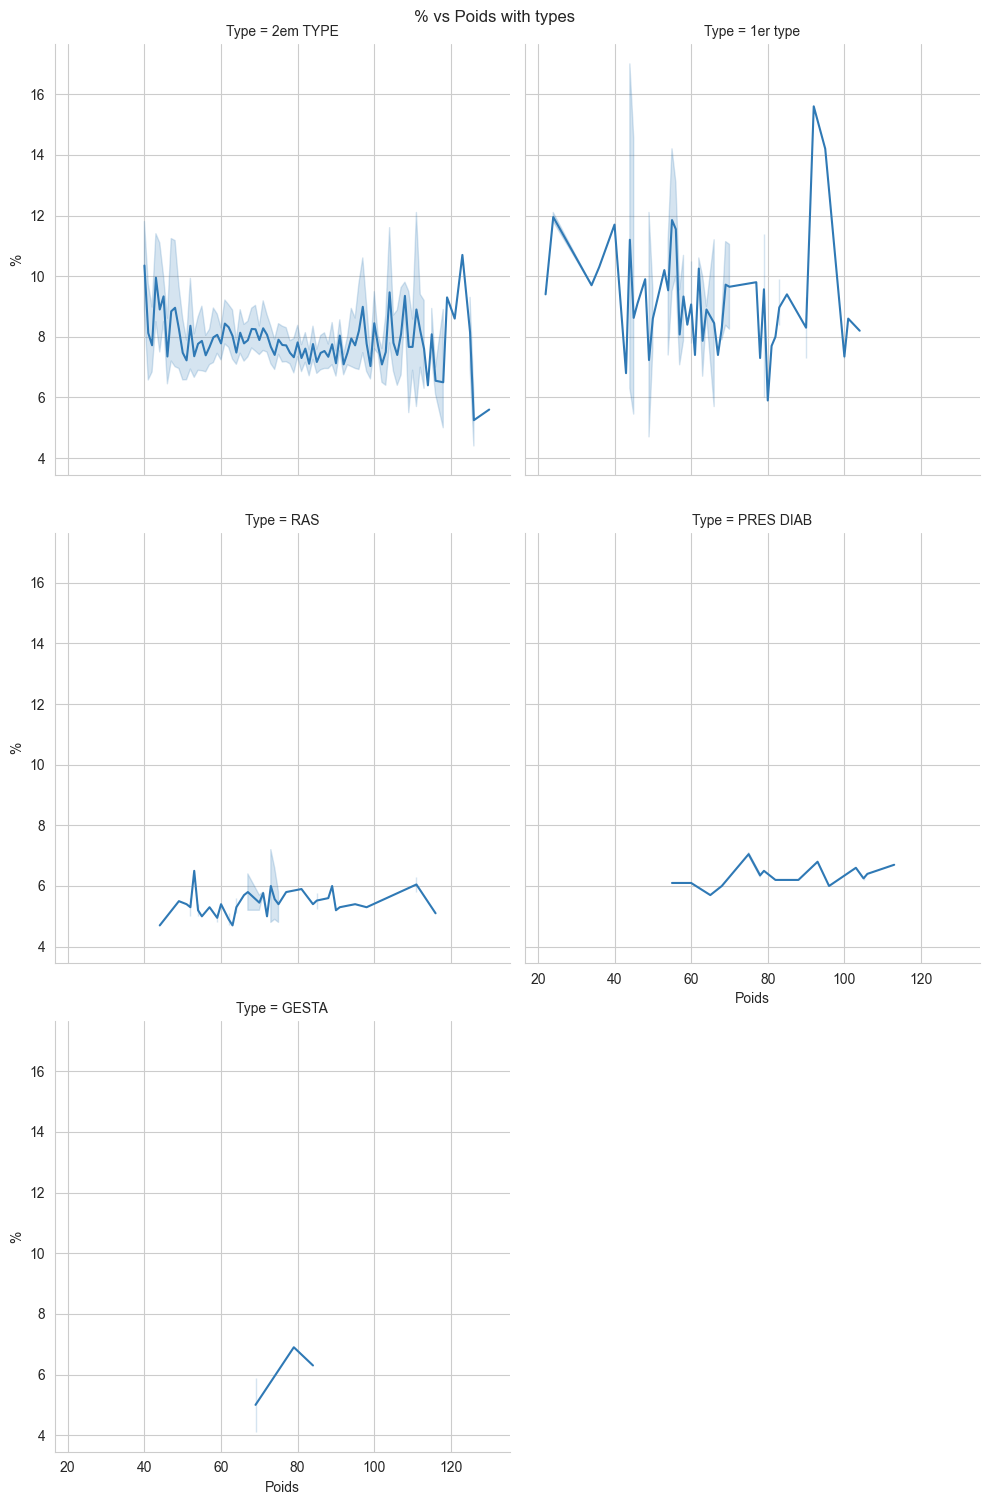

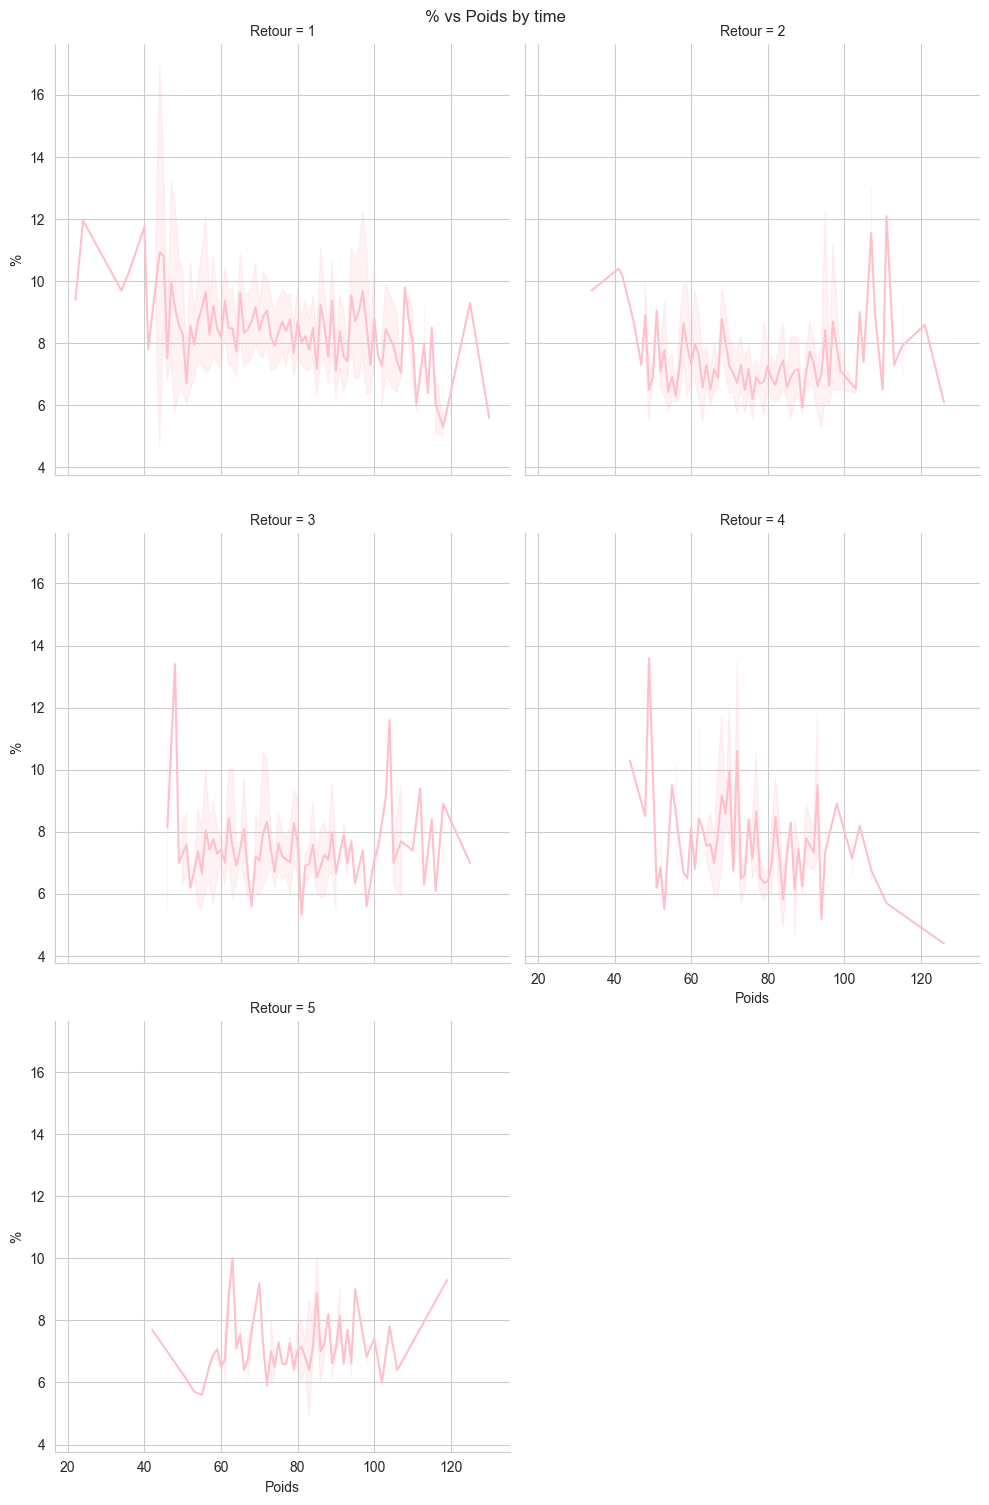

C:\Users\anasd\AppData\Local\Temp\ipykernel_25984\2191021481.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _range['Poids'] = _range['Poids'] / 10
C:\Users\anasd\AppData\Local\Temp\ipykernel_25984\2191021481.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _range['Poids'] = _range['Poids'].round(0) * 10


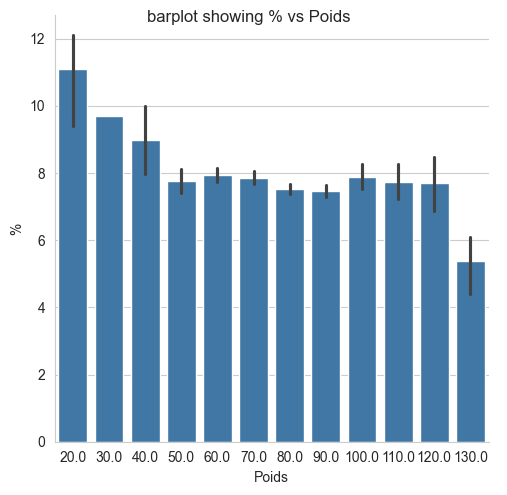

in Poids

the range with the minumun % : 80.0 with  4.0 %

the range with the maxumin % : 70.0 with  18.7 %



C:\Users\anasd\AppData\Local\Temp\ipykernel_25984\2191021481.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _range['Age'] = _range['Age'] / 10
C:\Users\anasd\AppData\Local\Temp\ipykernel_25984\2191021481.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _range['Age'] = _range['Age'].round(0) * 10


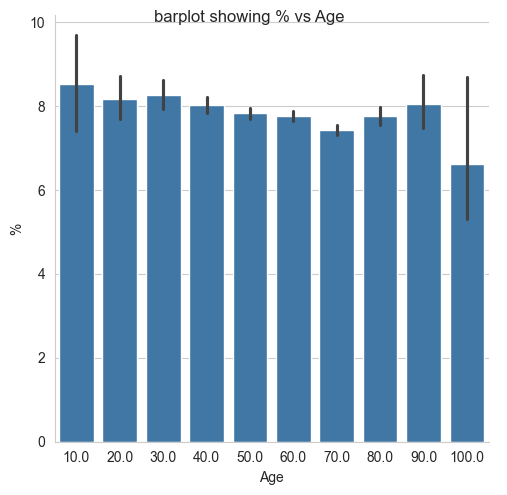

in Age

the range with the minumun % : 60.0 with  3.1 %

the range with the maxumin % : 80.0 with  18.7 %



In [23]:

# relations between poids and % and age 
sns.set_style('whitegrid')
sns.set_palette('RdBu_r')

# is the higher the wight the heigher the % ?
sns.relplot(x='Poids',y='%',data=diabete,color='g',markers=True,kind='line')
plt.title('% vs Poids in general')
plt.show()

# we add the types
#getting the necessary types
type_list = []
for key in diabete['Type'].value_counts().index:
    type_list.append(key)
type_list.pop()

# showing the plot
sns.relplot(x='Poids',y='%',data=diabete,markers=True,kind='line',col='Type',col_wrap=2,col_order=type_list).fig.suptitle('% vs Poids with types',y=1)
plt.show()
 
# what is difference in poids vs % in retour 
sns.relplot(x='Poids',y='%',data=diabete,markers=True,kind='line',col='Retour',col_wrap=2,col_order=[1,2,3,4,5],color='#FFC0CB').fig.suptitle('% vs Poids by time',y=1)
plt.show()

# which age range is better in % 
_range = diabete[['Numero','Nom','Age','%',"Poids"]]
# getting the Poids ranges
_range['Poids'] = _range['Poids'] / 10
_range['Poids'] = _range['Poids'].round(0) * 10

# drow the bar plot
sns.catplot(x='Poids',y='%',data=_range,kind='bar').fig.suptitle('barplot showing % vs Poids')
plt.show()

# which range in better and wich is worse in poids
min_max = _range.groupby('Poids')['%'].agg(['min','max'])
# min and maxvalues
min_perc = min_max['min'].min()
max_perc = min_max['max'].max()

print('in Poids\n')
print('the range with the minumun % :',min_max[min_max['min'] == min_perc].index[0],'with ',min_perc,'%\n')
print('the range with the maxumin % :',min_max[min_max['max'] == max_perc].index[0],'with ',max_perc,'%\n')

# getting the Age ranges 
_range['Age'] = _range['Age'] / 10
_range['Age'] = _range['Age'].round(0) * 10

# drow the bar plot
sns.catplot(x='Age',y='%',data=_range,kind='bar').fig.suptitle('barplot showing % vs Age')
plt.show()

# which range in better and wich is worse in age
min_max = _range.groupby('Age')['%'].agg(['min','max'])
# min and maxvalues
min_perc = min_max['min'].min()
max_perc = min_max['max'].max()

print('in Age\n')
print('the range with the minumun % :',min_max[min_max['min'] == min_perc].index[0],'with ',min_perc,'%\n')
print('the range with the maxumin % :',min_max[min_max['max'] == max_perc].index[0],'with ',max_perc,'%\n')

## answering some questions using years

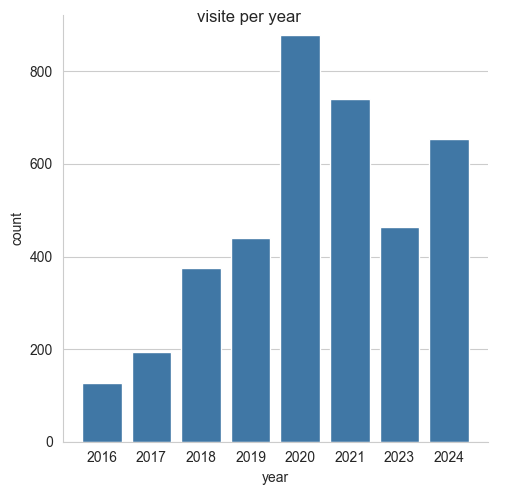

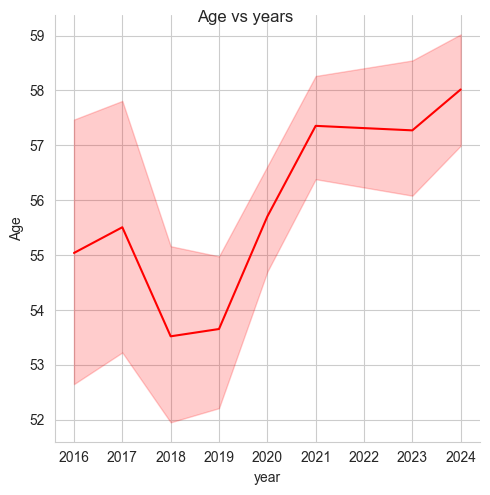

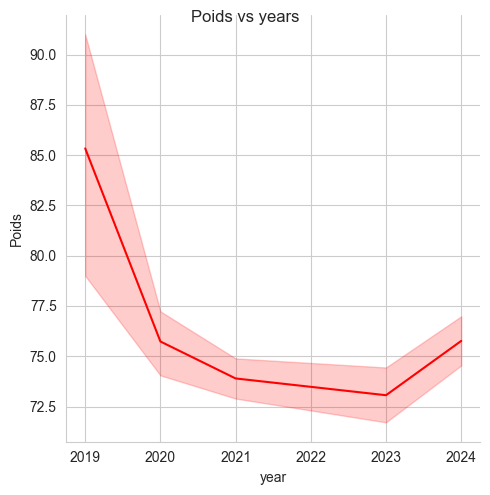

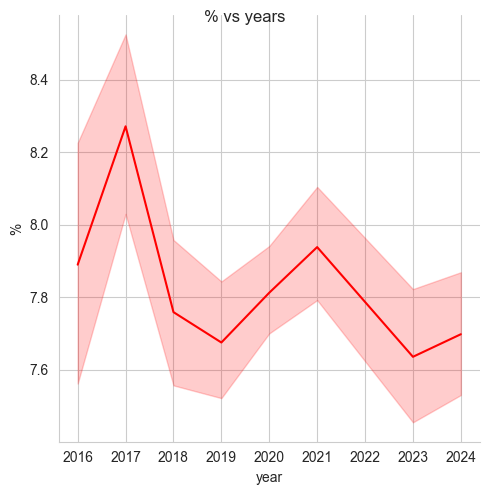

for people coming for more than one time


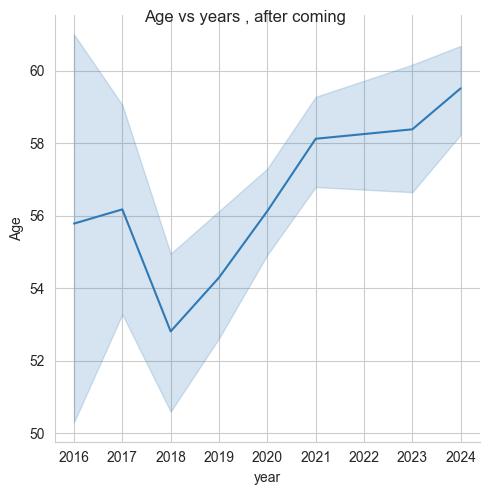

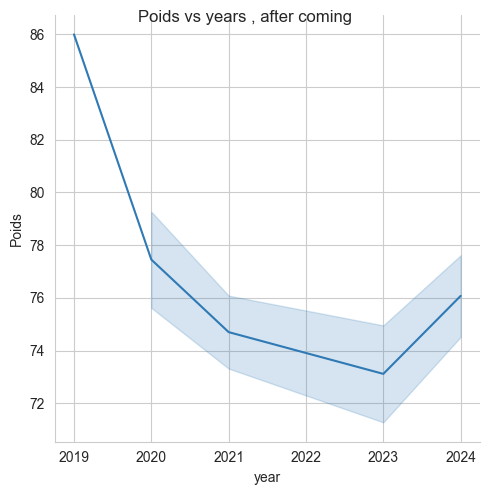

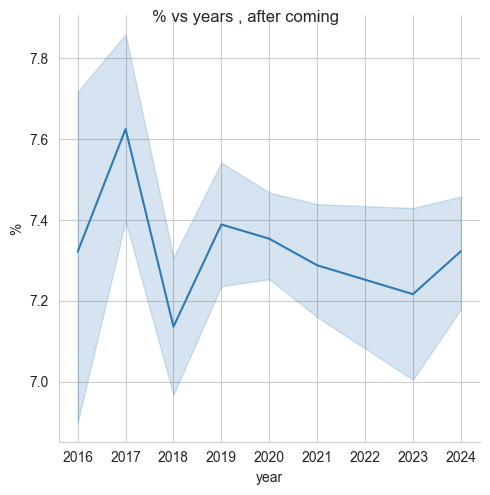

for people coming for more than one time and adding types


C:\Users\anasd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


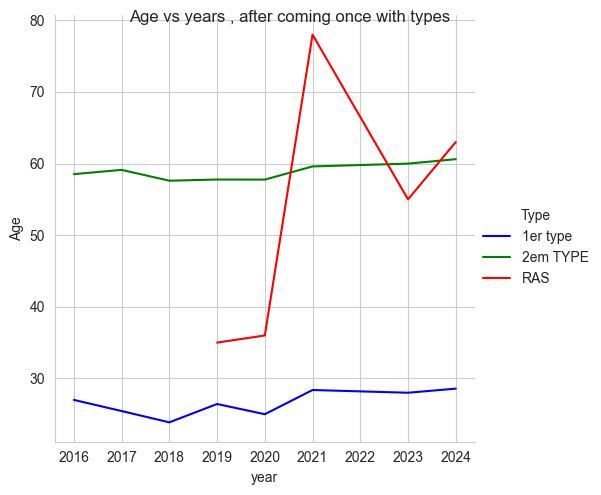

C:\Users\anasd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


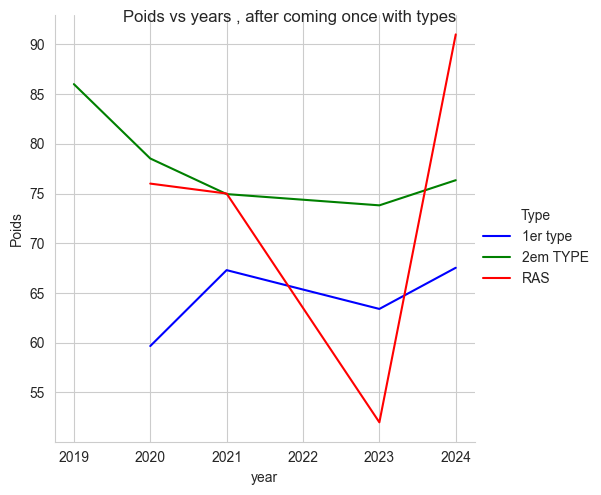

C:\Users\anasd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


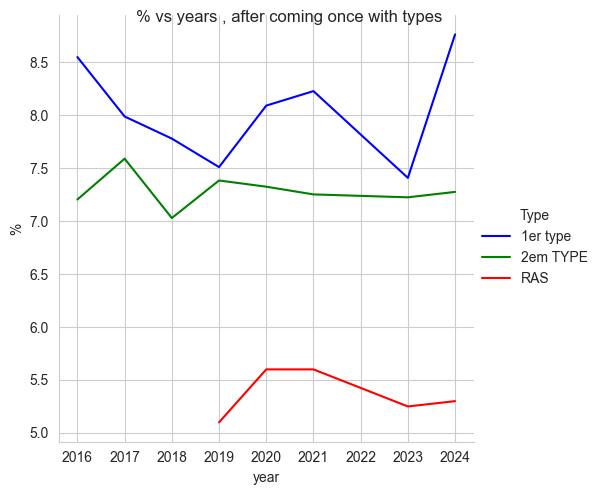

In [24]:
r = diabete
r['year'] = diabete['Date'].dt.year
r['month'] = diabete['Date'].dt.month

# looking for the most freq year using bar plot
sns.catplot(x='year',data=r,kind='count').fig.suptitle('visite per year')
plt.plot()

# looking for the change of avg Poids , age , % in the years 
list_key = ['Age','Poids','%']

for key in list_key :
    sns.relplot(x='year',y=key,data=r,kind='line',color='r').fig.suptitle(str(key)+' vs years')
    plt.show()
  
# for people coming over time
print('for people coming for more than one time')

for key in list_key :
    sns.relplot(x='year',y=key,data=r[r['Retour'] > 1],kind='line').fig.suptitle(str(key)+' vs years , after coming')
    plt.show()
    
# for people coming over time with types 
types = ['1er type','2em TYPE','RAS']
print('for people coming for more than one time and adding types')

for key in list_key :
    sns.relplot(x='year',y=key,data=r[r['Retour'] > 1],kind='line',hue='Type',hue_order=types,palette=  ['b','g','r'],ci=None).fig.suptitle(str(key)+' vs years , after coming once with types')
    plt.show()

### statistics on corona years

C:\Users\anasd\AppData\Local\Temp\ipykernel_25984\2615053206.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='month',data=diabete,kind='count',palette='RdBu',col='year',col_wrap=2).fig.suptitle('looking for missing months')


[]

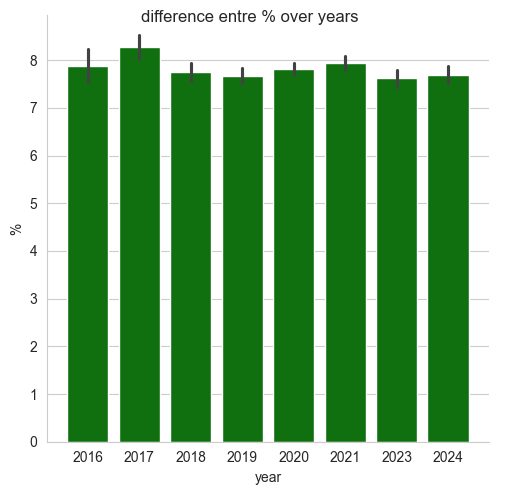

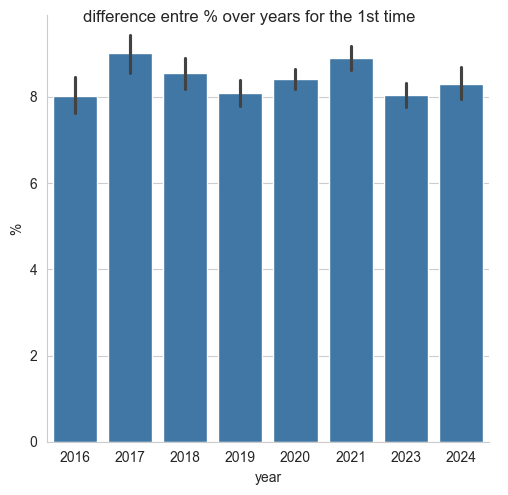

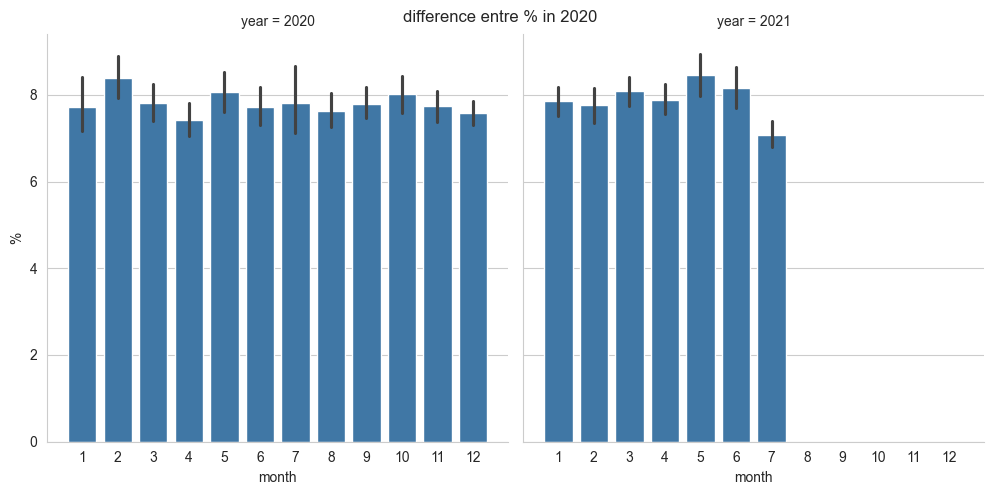

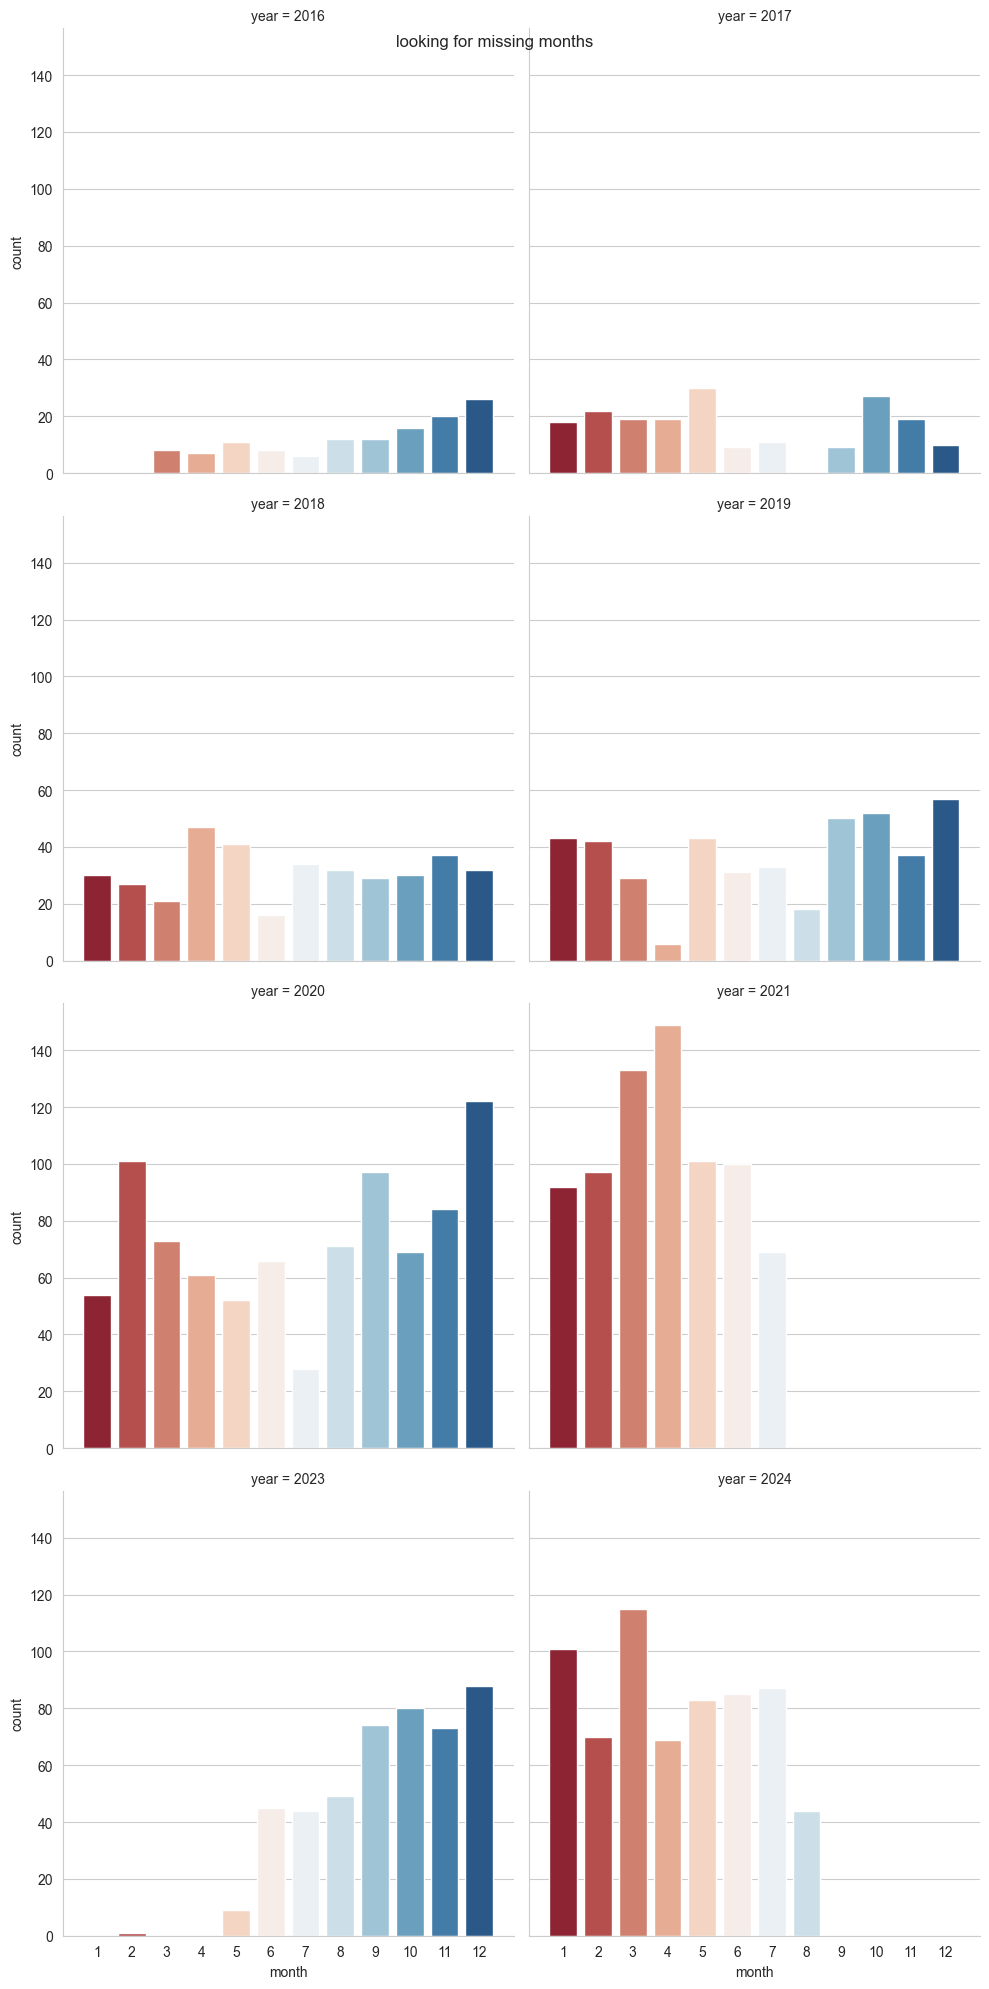

In [25]:
years = [2020,2021,2022,2023,2024]

# which month was buzier
corona = r[ (r['year'] > 2019) & (r['year'] < 2022) ]
corona

# difference entre % over years
sns.catplot(x='year',y='%',data=diabete,kind='bar',color='g').fig.suptitle('difference entre % over years')
plt.plot()

# difference entre % over years for the 1st time
sns.catplot(x='year',y='%',data=diabete[diabete['Retour'] == 1],kind='bar').fig.suptitle('difference entre % over years for the 1st time')

# looking for % in corona years 2020-2021
sns.catplot(x='month',y='%',data=corona,kind='bar',col='year').fig.suptitle('difference entre % in 2020')
plt.plot()

# looking for missing days
sns.catplot(x='month',data=diabete,kind='count',palette='RdBu',col='year',col_wrap=2).fig.suptitle('looking for missing months')
plt.plot()


### does often people get better than others ?

often people


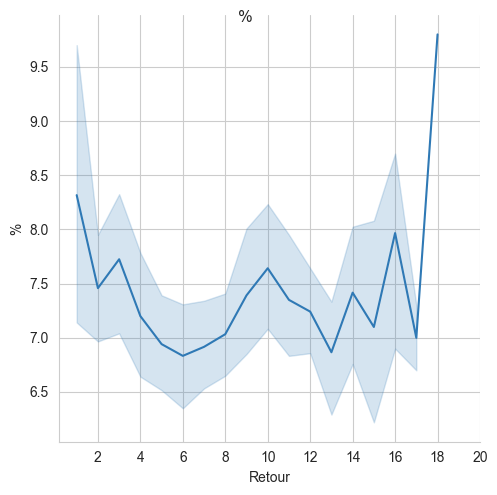

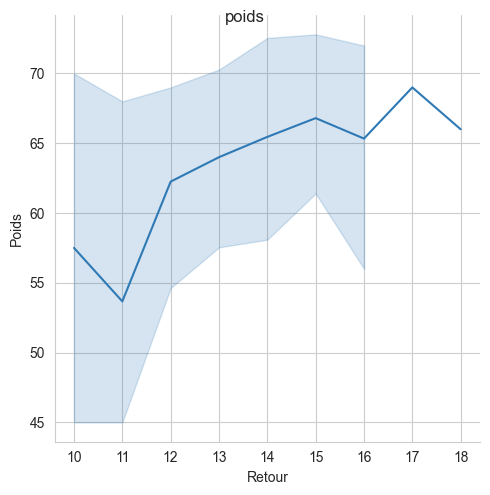

few people


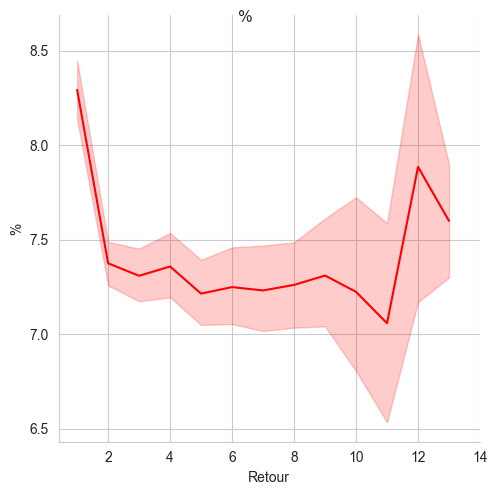

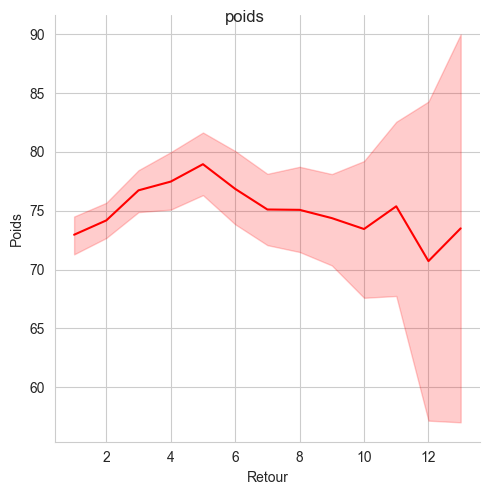

In [26]:

# often people ( > 14 )
lis1 = []
indexes = diabete[diabete['Retour'] == 14] 

for key in range(indexes.shape[0]):
    lis1.append(indexes.iloc[key,3])

often = diabete[diabete['Nom'].isin(lis1)]

# show the plots
print('often people')
# % plot
sns.relplot(x='Retour',y='%',data=often,kind='line').fig.suptitle('%')
plt.xticks([2,4,6,8,10,12,14,16,18,20])
# poids plot
sns.relplot(x='Retour',y='Poids',data=often,kind='line').fig.suptitle('poids')
plt.show()


# few people ( 2 < and > 9)
lis2 = []
indexes = diabete[(diabete['Retour'] >= 2) & (diabete['Retour'] <= 9)]

for key in range(indexes.shape[0]):
    lis2.append(indexes.iloc[key,3])

few = diabete[(diabete['Nom'].isin(lis2)) & (~diabete['Nom'].isin(lis1))]

# show the plots
print('few people')
# % plot
sns.relplot(x='Retour',y='%',data=few,kind='line',color='r').fig.suptitle('%')
plt.xticks([2,4,6,8,10,12,14])
# poids plot
sns.relplot(x='Retour',y='Poids',data=few,kind='line',color='r').fig.suptitle('poids')
plt.show()

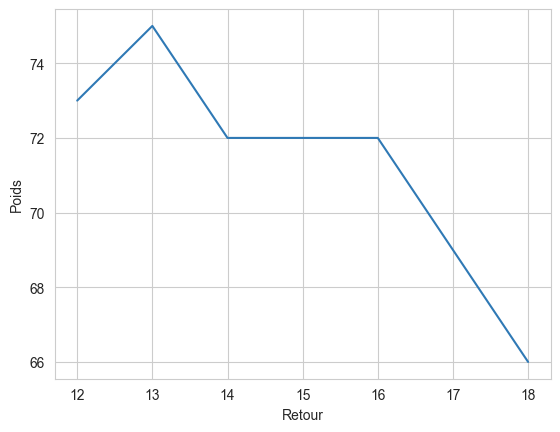

In [28]:
sns.lineplot(x='Retour',y='Poids',data=diabete[diabete['Nom'] == 'SALAMANI KHEIRA'])
plt.show()